In [277]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sn

In [278]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [279]:
Data = pd.read_excel('Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx')
Data["SESSO"].replace({'M': 0.,'F': 1.}, inplace=True)

In [280]:
def Suprimun_Tnorm(Relation, data):
    ror = np.vstack((Relation, data))
    sup_norm = np.max(np.min(ror, axis=0))
    return sup_norm


def composition(relation , data):
    composed = np.array(list(map(lambda x: list(map(lambda y: Suprimun_Tnorm(relation[x], data[y]),range(data.shape[0]))),range(relation.shape[0]))))
    return composed


def split_by_class(TrainData):
    Data0 = TrainData[TrainData['TARGET']==0]
    target0 = Data0['TARGET']
    Data0 = Data0.drop('TARGET',axis=1)
    Data0=(Data0-Data0.min())/(Data0.max()-Data0.min())
    Data1 = TrainData[TrainData['TARGET']==1]
    target1 = Data1['TARGET']
    Data1 = Data1.drop('TARGET',axis=1)
    Data1=(Data1-Data1.min())/(Data1.max()-Data1.min())
    Data2 = TrainData[TrainData['TARGET']==2]
    target2 = Data2['TARGET']
    Data2 = Data2.drop('TARGET',axis=1)
    Data2=(Data2-Data2.min())/(Data2.max()-Data2.min())
    return Data0 , Data1, Data2 , target0, target1, target2 



In [281]:
#fill misiing values 
imputer= KNNImputer(n_neighbors=4)
Data = imputer.fit_transform(Data[['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET']])
Data = pd.DataFrame(Data, columns = ['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET'])
# Data = pd.concat([Data1, Data2,Data0])






In [282]:
#split to teset and train 
# Dataset1 = PreprocessData.NomalizeData(Data)
Dataset = PreprocessData.TestAndTrain(Data , 80)

TrainData = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)
TestData=(TestData-TestData.min())/(TestData.max()-TestData.min())

In [283]:
Data0 , Data1, Data2 , target0, target1, target2  = split_by_class(TrainData)
    

In [284]:
min0 = Data0.min(axis=0)
max0 = Data0.max(axis=0)
min1 = Data1.min(axis=0)
max1 = Data1.max(axis=0)
min2 = Data2.min(axis=0)
max2 = Data2.max(axis=0)

In [285]:
# method 1 create similarity matrix based on numeric range 
# avg0 = (min0 + max0 )/2
# avg0['SESSO']=0
# avg1 = (min1 + max1 )/2
# avg1['SESSO']=0
# avg2 = (min2 + max2 )/2
# avg1['SESSO']=0
# avg0 = np.array(avg0)
# avg1 = np.array(avg1)
# avg2 = np.array(avg2)


#method 2 , create similarity matrix based on mean of the class 
avg0 = Data0.mean()
avg0['SESSO']=0
avg1 = Data1.mean()
avg1['SESSO']=0
avg2 = Data2.mean()
avg1['SESSO']=0
avg0 = np.array(avg0)
avg1 = np.array(avg1)
avg2 = np.array(avg2)


In [286]:
avg0.shape

(15,)

In [287]:
avg1.shape

(15,)

In [288]:
avg2

array([0.16363636, 0.66350461, 0.27899863, 0.30235498, 0.31855836,
       0.27145455, 0.35213904, 0.13636364, 0.08787879, 0.30033658,
       0.10245747, 0.1941681 , 0.12579021, 0.11995299, 0.28373666])

In [289]:
RelationMatrix =[ avg0,avg1,avg2]


In [290]:
RelationMatrix = np.array(RelationMatrix)

In [291]:
RelationMatrix.shape

(3, 15)

In [292]:
RelationMatrix

array([[0.        , 0.50838415, 0.30836237, 0.48843173, 0.24656035,
        0.3388055 , 0.21666011, 0.07059099, 0.20731707, 0.17637905,
        0.06000485, 0.07096364, 0.06013996, 0.05963937, 0.34282271],
       [0.        , 0.65946844, 0.29655172, 0.40272654, 0.35363117,
        0.11067886, 0.34907946, 0.06007752, 0.01162791, 0.24093597,
        0.14990798, 0.14081834, 0.10637358, 0.10487641, 0.29870088],
       [0.16363636, 0.66350461, 0.27899863, 0.30235498, 0.31855836,
        0.27145455, 0.35213904, 0.13636364, 0.08787879, 0.30033658,
        0.10245747, 0.1941681 , 0.12579021, 0.11995299, 0.28373666]])

In [312]:
TestData = np.array(TestData)
SimilarityMatrix = composition(RelationMatrix , TestData)

In [294]:

predict = []
for i in range(SimilarityMatrix.shape[1]):
    a = np.argmax(SimilarityMatrix[:,i])
    predict.append(a)

In [295]:
atcutal= np.array(targetTest)
predict = np.array(predict)

In [303]:
conf3 = confusion_matrix(atcutal, predict )

In [304]:
accuracy_score(atcutal, predict)

0.39285714285714285

In [305]:
#change 3 class to two class , class 0 and class 1
actual1 =np.zeros(len(predict))
pred1 =np.zeros(len(predict))
for i in range(len(predict)):
    if(predict[i] == 2 ):
        pred1[i]=1
    else:
        pred1[i]=predict[i]
    if(atcutal[i]==2):
        actual1[i]=1
    else:
        actual1[i] = atcutal[i]

In [306]:
accuracy_score(actual1, pred1)

0.7142857142857143

In [307]:
conf2 = confusion_matrix(actual1, pred1 )

<AxesSubplot:>

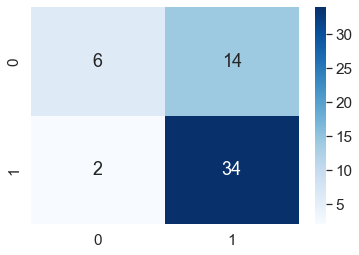

In [ ]:

df_cm = pd.DataFrame(conf2, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18} , cmap='Blues')

<AxesSubplot:>

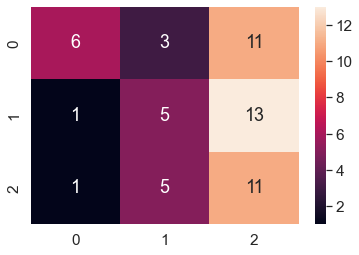

In [309]:
df_cm = pd.DataFrame(conf3, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18}) # font size